# 1.0 Importing libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from sklearn import metrics as mt
from sklearn import cluster as ct

# 2.0 Functions

# 3.0 Loading dataset

In [3]:
# Training data
X_train = pd.read_csv('datasets/pa_datasets/clustering/X_dataset.csv')

# 4.0 Checking dataset

In [4]:
print(f'Number of rows: {X_train.shape[0]}')
print(f'Number of columns: {X_train.shape[1]}')

Number of rows: 178
Number of columns: 13


In [5]:
X_train.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [7]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')

# 5.0 K-Means

In [8]:
n_clusters = []
ss_list = []

for i in range(2, 15):
    n_clusters.append(i)
    # define
    kmeans = ct.KMeans(n_clusters = i, n_init=1)
    
    # fit 
    labels = kmeans.fit_predict(X_train)
    
    # performance
    ss_avg = mt.silhouette_score(X_train, labels)
    
    ss_list.append(ss_avg)

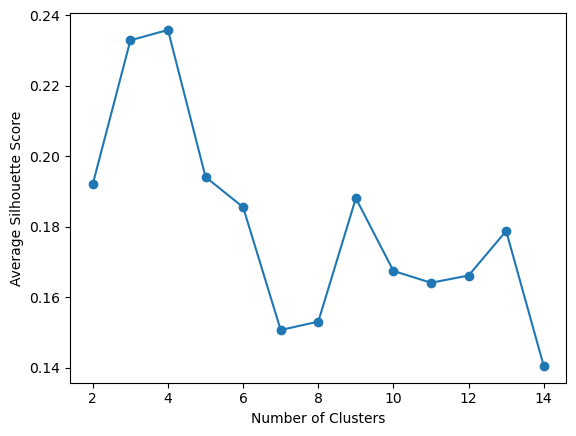

In [9]:
plt.plot( n_clusters, ss_list, marker='o' )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Average Silhouette Score' );


In [168]:
d = {'K':n_clusters, 'SS Score':ss_list}
kmeans_ss_results = pd.DataFrame(data=d)

In [171]:
best_kmeans = kmeans_ss_results.loc[kmeans_ss_results['SS Score'] == kmeans_ss_results['SS Score'].max()]
best_kmeans

,K,SS Score
2,4,0.235905


# 6.0 Affinity Propagation

In [232]:
af_ss_results = pd.DataFrame()
ss_results = []
for i in range(-100, -1):
    # define
    af = ct.AffinityPropagation(preference=i)
    
    # fit
    af.fit(X_train)
    
    # predict
    labels = af.predict(X_train)
    
    # performance
    ss_results.append(mt.silhouette_score(X_train, labels))
    
    for j in range(len(ss_results)):
        results_ss = pd.DataFrame({'Preference': i, 'SS Score': ss_results[j]}, index=[0])
    
    
    af_ss_results = pd.concat( [af_ss_results, results_ss ], axis=0)

In [233]:
af_ss_results

,Preference,SS Score
0,-100,0.158776
0,-99,0.153280
0,-98,0.153280
0,-97,0.153280
0,-96,0.153280
...,...,...
0,-6,0.164841
0,-5,0.164493
0,-4,0.156879
0,-3,0.148043


In [156]:
af_ss_results.reset_index(drop=True, inplace=True)

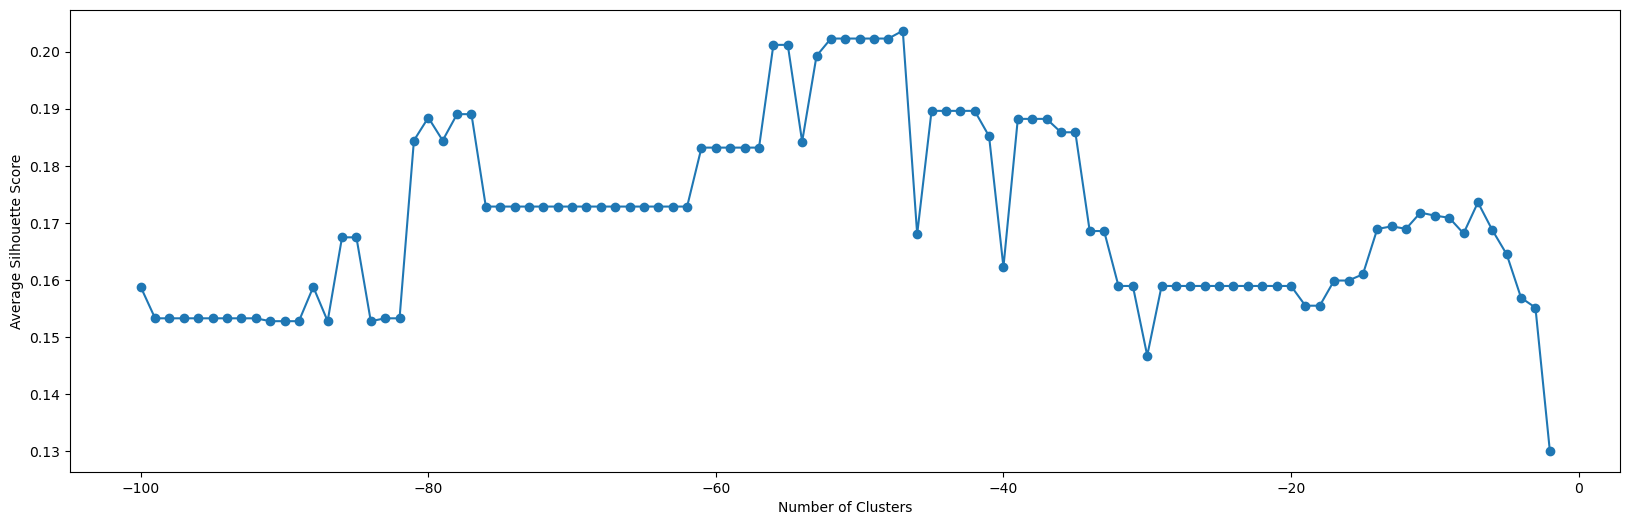

In [157]:
plt.figure(figsize=(20,6))
plt.plot( af_ss_results['Preference'],  af_ss_results['SS Score'], marker='o' )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Average Silhouette Score' );

In [197]:
best_af_ss = af_ss_results.loc[af_ss_results['SS Score'] == af_ss_results['SS Score'].max() ].reset_index(drop=True)
best_af_ss

,Preference,SS Score
0,-47,0.203658


In [198]:
best_af_ss['SS Score'][0]

0.20365750456597356

# 7.0 Comparing Results

In [162]:
clustering_results = pd.DataFrame(columns=['model', 'silhouette_score'])

In [228]:
clustering_results.at[0, 'model'] = 'K-Means'
clustering_results.at[0, 'silhouette_score'] = round(kmeans_ss_results['SS Score'][0], 4)

clustering_results.at[1, 'model'] = 'Affinity Propagation'
clustering_results.at[1, 'silhouette_score'] = round(best_af_ss['SS Score'][0], 4)

In [229]:
clustering_results

,model,silhouette_score
0,K-Means,0.1922
1,Affinity Propagation,0.2037


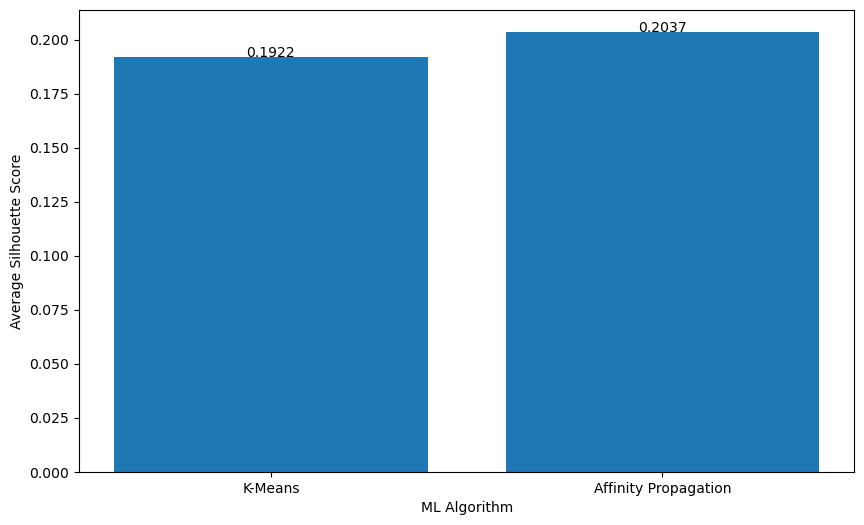

In [230]:
plt.figure(figsize=(10,6))
ax = plt.bar( clustering_results['model'],  clustering_results['silhouette_score'] )
for i in range(len(clustering_results['model'])):
    plt.text(i, clustering_results['silhouette_score'][i], clustering_results['silhouette_score'][i], ha = 'center')
plt.xlabel( 'ML Algorithm' );
plt.ylabel( 'Average Silhouette Score' );